In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import straxen
from multihist import Histdd, Hist1d

import sys
import os.path as osp

In [2]:
st = straxen.contexts.xenon1t_dali()

In [12]:
runs = st.select_runs(available='event_info')

Checking data availability: 100%|██████████| 5/5 [00:52<00:00, 10.48s/it]


In [14]:
runs.head()

,name,number,start,reader.ini.name,trigger.events_built,end,tags,mode,livetime,tags.name,records_available,events_available,event_info_available,peaklets_available,raw_records_available
0,170204_1410,6786,2017-02-04 14:10:08+00:00,background_stable,19574,2017-02-04 15:10:13+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:05,NaN,True,True,True,True,True
1,170204_1510,6787,2017-02-04 15:10:28+00:00,background_stable,19634,2017-02-04 16:10:32+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True
2,170204_1610,6788,2017-02-04 16:10:39+00:00,background_stable,19400,2017-02-04 17:10:43+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True
3,170204_1710,6789,2017-02-04 17:10:51+00:00,background_stable,19415,2017-02-04 18:10:54+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:03,NaN,True,True,True,True,True
4,170204_1810,6790,2017-02-04 18:11:01+00:00,background_stable,19671,2017-02-04 19:11:05+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True


In [15]:
run_id = '170204_1410'
events = st.get_array(run_id,'event_basics')

In [38]:
st.data_info('peak_basics')

,Field name,Data type,Comment
0,time,int64,Start time of the peak (ns since unix epoch)
1,endtime,int64,End time of the peak (ns since unix epoch)
2,center_time,int64,Weighted center time of the peak (ns since uni...
3,area,float32,Peak integral in PE
4,n_channels,int16,Number of PMTs contributing to the peak
5,max_pmt,int16,PMT number which contributes the most PE
6,max_pmt_area,float32,Area of signal in the largest-contributing PMT...
7,range_50p_area,float32,Width (in ns) of the central 50% area of the peak
8,range_90p_area,float32,Width (in ns) of the central 90% area of the peak
9,area_fraction_top,float32,Fraction of area seen by the top array (NaN fo...


In [25]:
events['drift_time']

array([  466,  1017,  2582, ..., 14393,   466, 39567], dtype=int32)

Text(0, 1, 'counts')

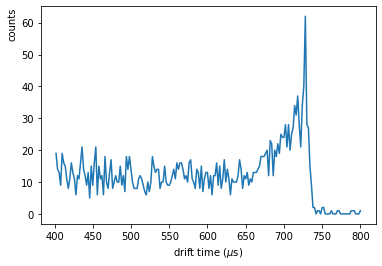

In [34]:
drift_hist, drift_bin = np.histogram(events['drift_time']/1000,bins=200, range=(400,800))
plt.plot(drift_bin[1:],drift_hist)
plt.xlabel('drift time ($\mu$s)')
plt.ylabel('counts', ha='right', y=1)
#plt.yscale('log')